# Feature Engineering

In [18]:
import sys
import pandas as pd
sys.path.append("../")
import warnings
warnings.filterwarnings("ignore")
from utils.engineering import saving_dataset, Plots

# Data

In [19]:
df = pd.read_csv("./Data/Abandono_clientes.csv")
print(f"Shape: {df.shape}")
df.head()

Shape: (10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Grouping `NumOfProducts` into three categories

In [20]:
df["NumOfProducts"] = df["NumOfProducts"].apply(lambda x: "3 or more" if x >= 3 else str(x))
df.groupby("NumOfProducts").agg(Exited_mean=('Exited', 'mean'), Count=('Exited', 'size')).reset_index()

,NumOfProducts,Exited_mean,Count
0,1,0.277144,5084
1,2,0.075817,4590
2,3 or more,0.858896,326


## Dropping columns that won't be used

In [21]:
df = df.drop(columns=["RowNumber", "CustomerId", "Surname"])

# Correlation Matrix

In [22]:
plotter = Plots(df)

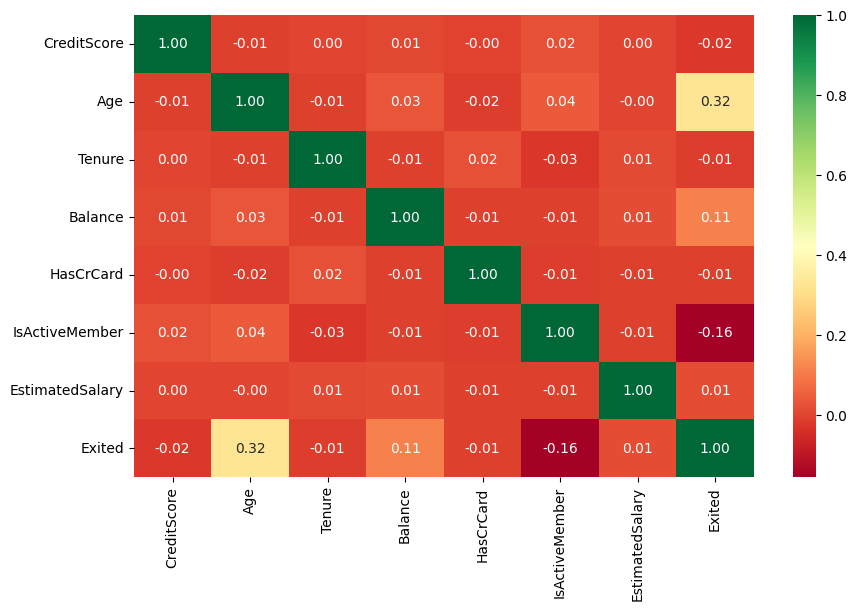

In [23]:
plotter.plot_corr("spearman", figsize=(10, 6))

### Observations:
- Since some features are categorical, the Spearman method is used 
- No feature truly has a correlation with the target, with only `Age` being considered with a weak correlation

# Features Distributions
### `Balance` is the numerical feature that didn't resemble a normal distribution. Since scaling techniques and certain models tend to perform better with normally distributed data, different transformation methods will be explored to see which works best for this feature and will also check all other numerical features to make sure that they are as normalized as possible.

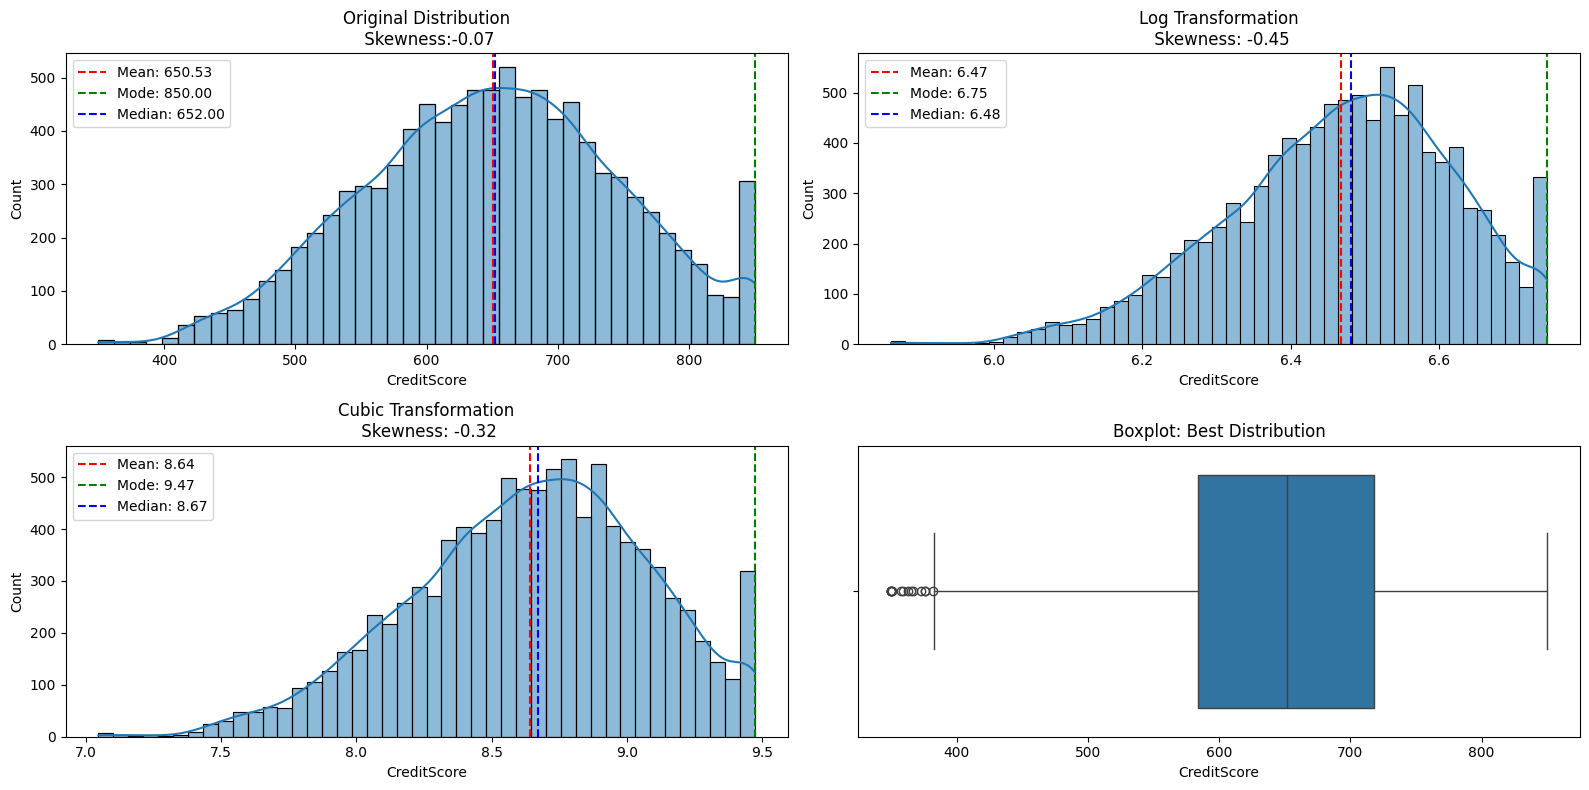

In [10]:
plotter.plot_transformed_distributions("CreditScore")

### For `CreditScore`, no transformation is needed

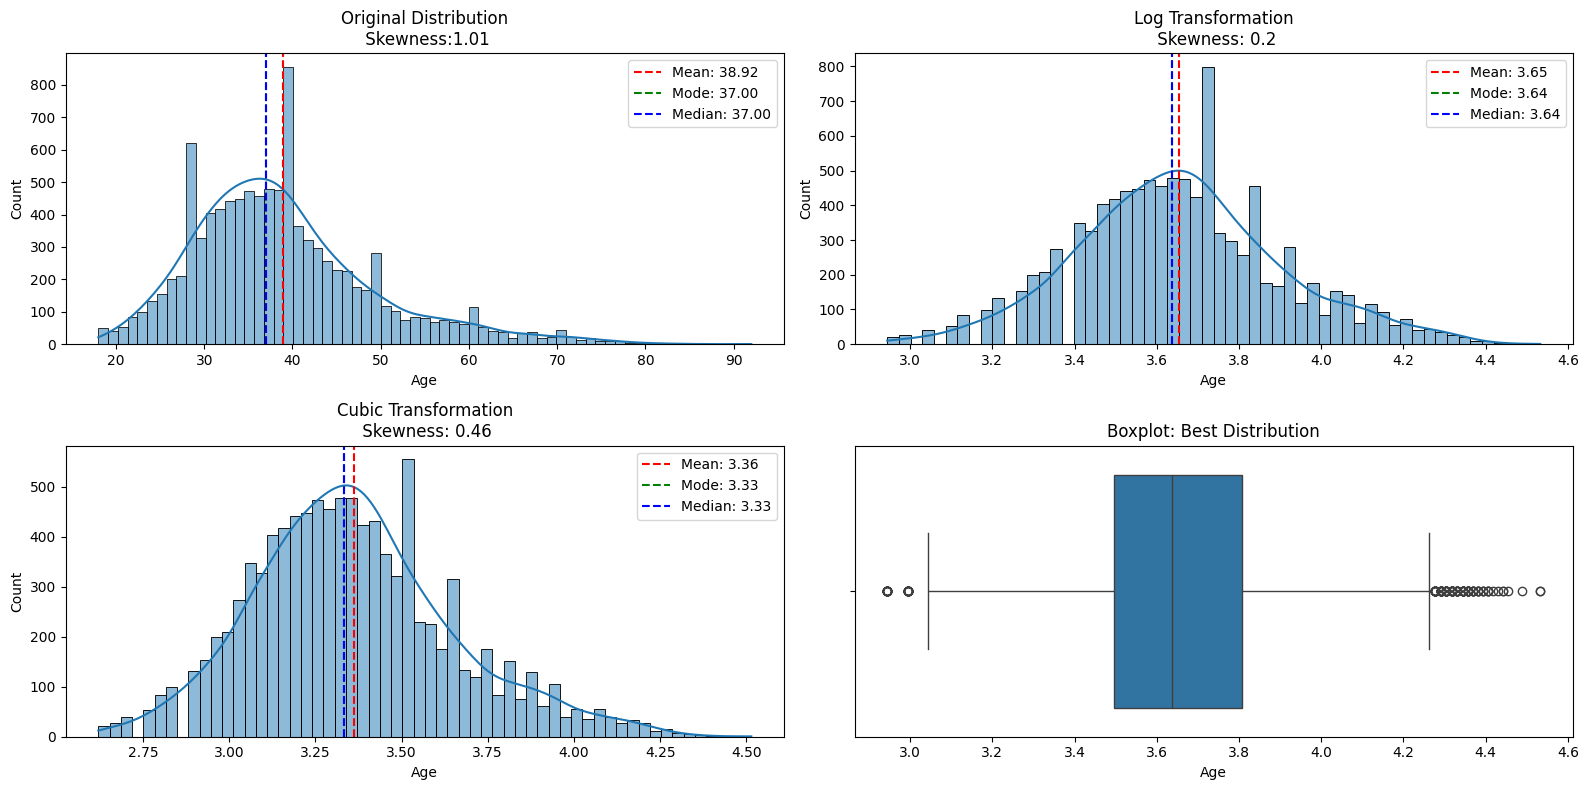

In [11]:
plotter.plot_transformed_distributions("Age")

### For `Age`, the **Log** transformation is the best one, with only a few outliers

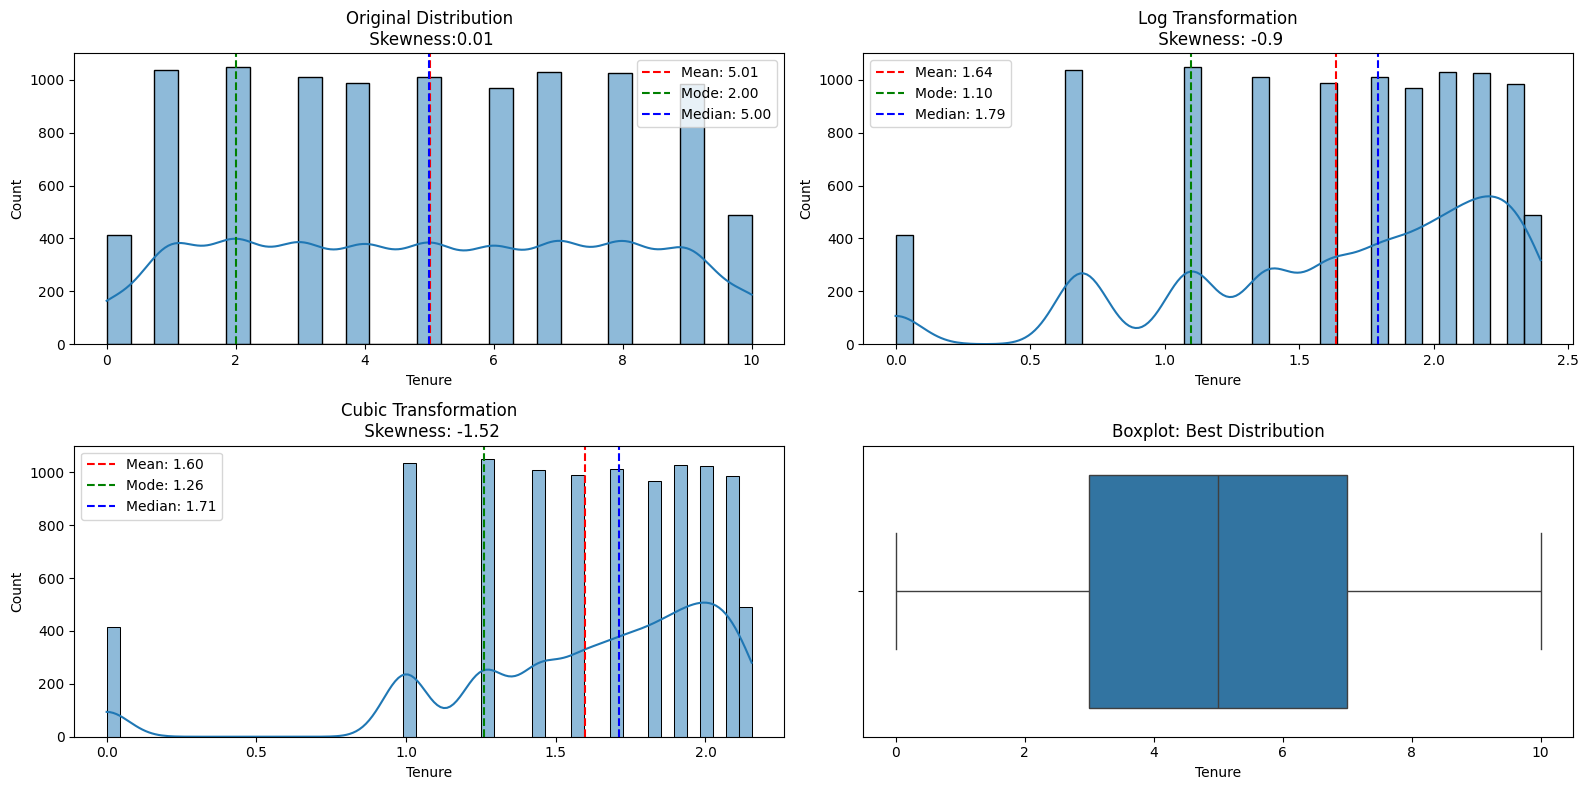

In [12]:
plotter.plot_transformed_distributions("Tenure")

### For `Tenure`, no transformation is needed

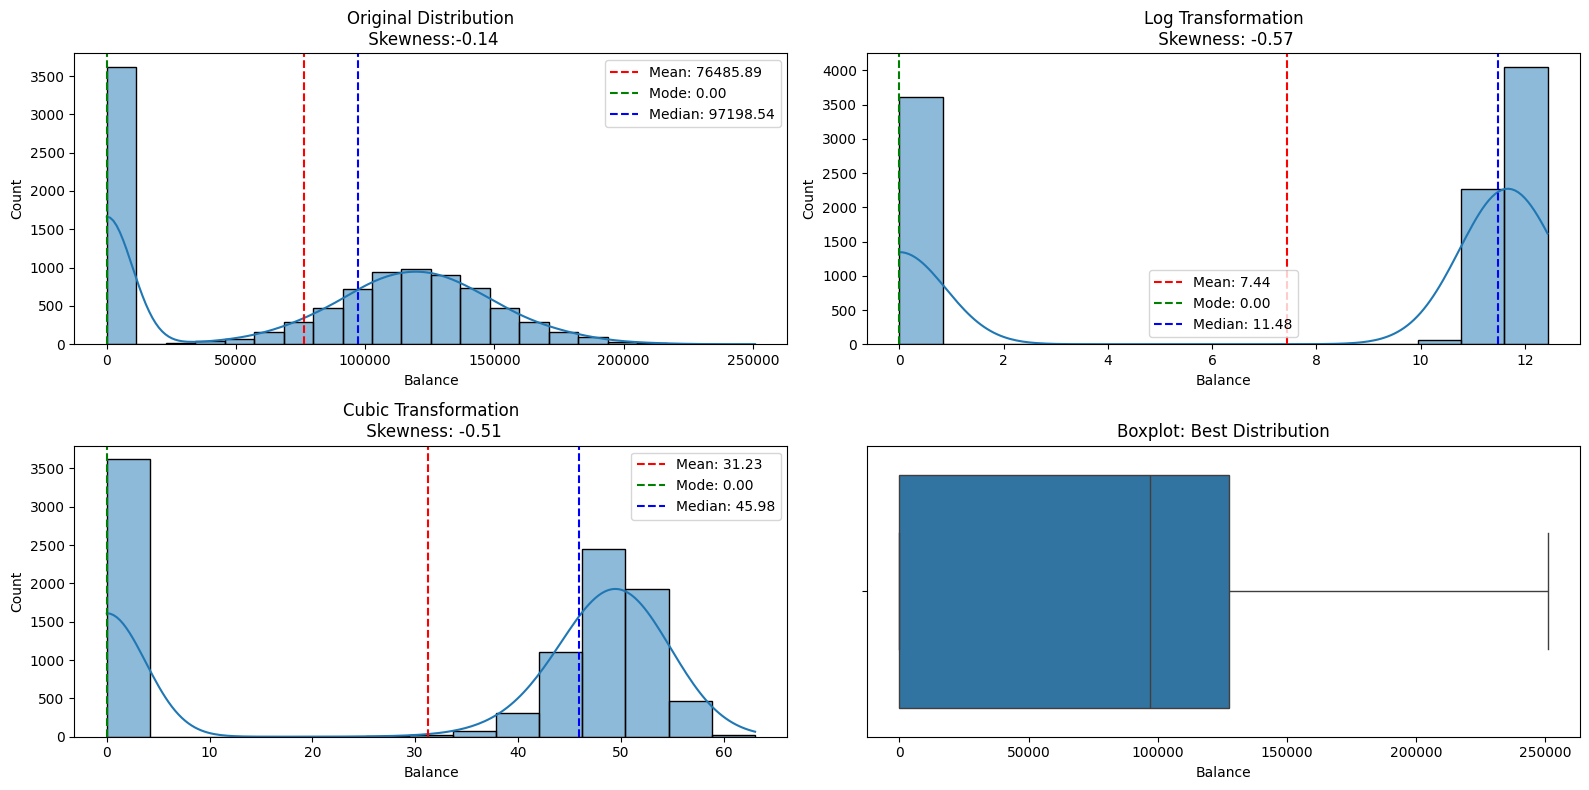

In [13]:
plotter.plot_transformed_distributions("Balance")

### For `Balance`, no transformation is needed

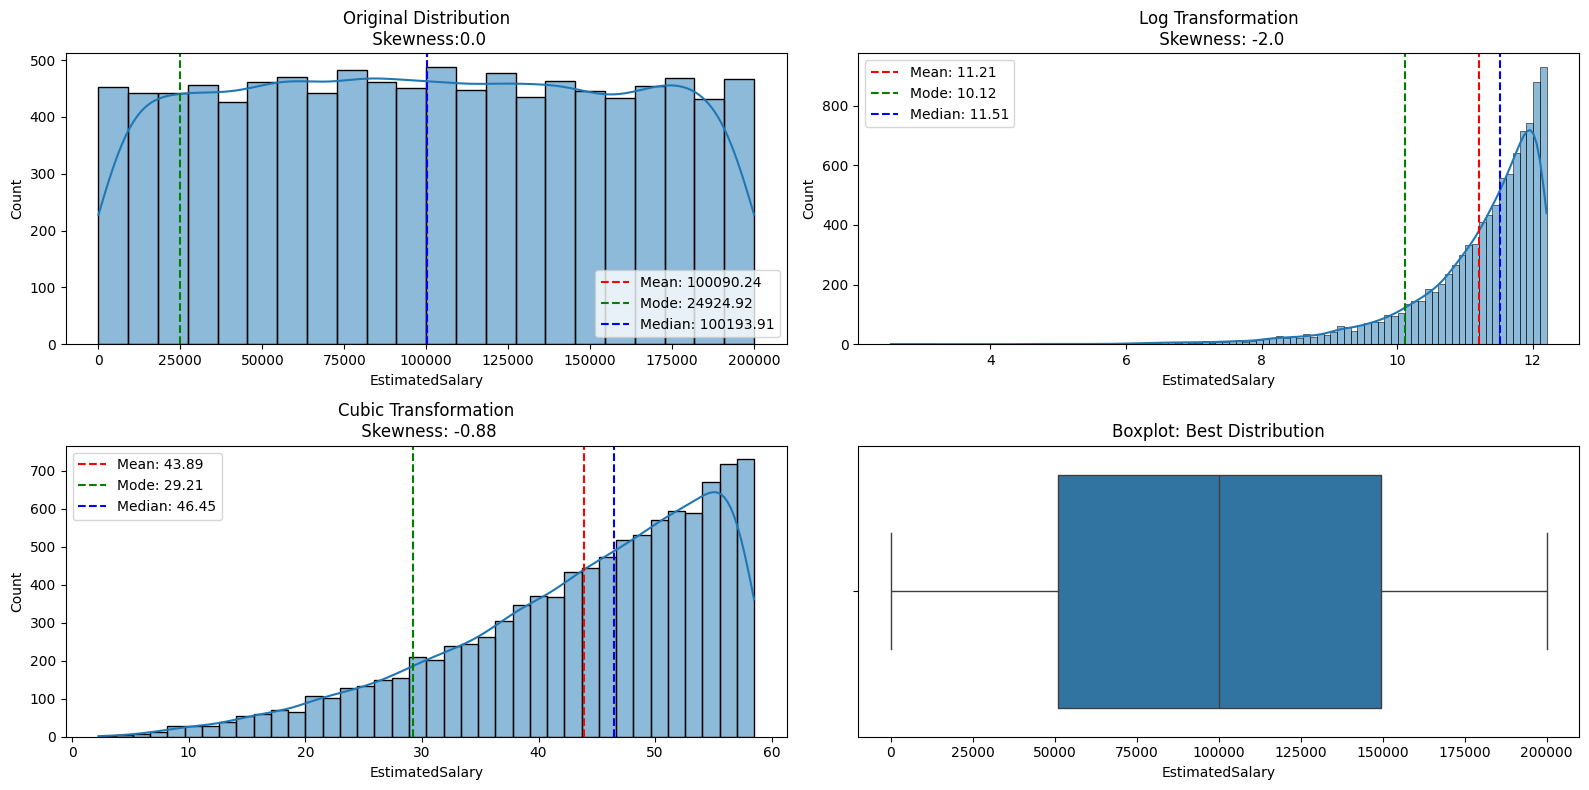

In [14]:
plotter.plot_transformed_distributions("EstimatedSalary")

### For `EstimatedSalary`, no transformation is needed

# Saving the datasets

### As mentioned in the EDA, two datasets will be saved. One will contain the columns `CreditScore`, `Tenure` and `EstimatedSalary` and the other won't

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  object 
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 859.5+ KB


In [26]:
saving_dataset(df, "Data", "ml_clientes_all_features")

In [27]:
df = df.drop(columns=["CreditScore", "Tenure", "EstimatedSalary"])
saving_dataset(df, "Data", "ml_clientes_reduced_features")